In [423]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#Regresión Logistica
 Importar librerías necesarias

In [424]:
# se utiliza para el manejo de rutas y directorios.
import os

# Calculo cientifico y vectorial para python
import numpy as np

# Librerias para graficar
import matplotlib.pyplot as plt

# Modulo de optimización de scipy
from scipy import optimize

# le dice a matplotlib que incruste gráficos en el cuaderno
%matplotlib inline
# Libreria de pandas
import pandas as pd

In [425]:
# Cargar dataset
# Columnas del dataset (según la documentación del Adult Dataset en UCI)
# Columnas definidas en el dataset
cols = ["age", "workclass", "fnlwgt", "education", "education-num",
        "marital-status", "occupation", "relationship", "race", "sex",
        "capital-gain", "capital-loss", "hours-per-week", "native-country", "income"]

df = pd.read_csv("/content/drive/MyDrive/IA/adult.data.txt", names=cols, sep=", ", engine="python")


print("Columnas:", df.columns)
print(df.head())
df.head()

Columnas: Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Mal

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [426]:
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# Preprocesamiento


In [427]:
from sklearn.preprocessing import LabelEncoder



# 1. Label encoding para income
le = LabelEncoder()
df["income_multiclass"] = df["sex"] + "_" + df["income"]
df["income_multiclass"] = le.fit_transform(df["income_multiclass"])
print(df["income_multiclass"].value_counts())

# Verificamos las primeras filas
df.head()

income_multiclass
2    15128
0     9592
3     6662
1     1179
Name: count, dtype: int64


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_multiclass
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,2
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,2
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,2
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,2
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0


In [428]:
print("Tipos de datos:\n", df.dtypes)
print(df.columns.tolist())


Tipos de datos:
 age                   int64
workclass            object
fnlwgt                int64
education            object
education-num         int64
marital-status       object
occupation           object
relationship         object
race                 object
sex                  object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
income               object
income_multiclass     int64
dtype: object
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income', 'income_multiclass']


In [429]:
# Eliminar columnas no usadas
df = df.drop(columns=["fnlwgt", "native-country", "income"])
categorical_cols = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "sex"]

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


# Convertir a int
df = df.astype(int)

print(df.head())

   age  workclass  education  education-num  marital-status  occupation  \
0   39          7          9             13               4           1   
1   50          6          9             13               2           4   
2   38          4         11              9               0           6   
3   53          4          1              7               2           6   
4   28          4          9             13               2          10   

   relationship  race  sex  capital-gain  capital-loss  hours-per-week  \
0             1     4    1          2174             0              40   
1             0     4    1             0             0              13   
2             1     4    1             0             0              40   
3             0     2    1             0             0              40   
4             5     2    0             0             0              40   

   income_multiclass  
0                  2  
1                  2  
2                  2  
3           

In [430]:
print(df)

       age  workclass  education  education-num  marital-status  occupation  \
0       39          7          9             13               4           1   
1       50          6          9             13               2           4   
2       38          4         11              9               0           6   
3       53          4          1              7               2           6   
4       28          4          9             13               2          10   
...    ...        ...        ...            ...             ...         ...   
32556   27          4          7             12               2          13   
32557   40          4         11              9               2           7   
32558   58          4         11              9               6           1   
32559   22          4         11              9               4           1   
32560   52          5         11              9               2           4   

       relationship  race  sex  capital-gain  capit

In [431]:
# Variables predictoras y target
X = df.drop("income_multiclass", axis=1).values
y = df["income_multiclass"].values

num_labels = len(np.unique(y))
# Columnas numéricas (continuas + binarias)
# num_cols = ["age", "avg_glucose_level", "bmi", "hypertension", "heart_disease"]

# Columnas categóricas (todo lo demás excepto 'id')
# cat_cols = [col for col in X.columns if col not in num_cols ]
print("Número de clases:", num_labels)

Número de clases: 4


In [432]:
before = df.shape[0]

# Eliminar filas con NaN
df_clean = df.dropna()

# Número de filas después de limpiar
after = df_clean.shape[0]

# Calcular cuántos ejemplos se borraron
removed = before - after

print(f"Filas antes: {before}")
print(f"Filas después: {after}")
print(f"Filas eliminadas: {removed}")

Filas antes: 32561
Filas después: 32561
Filas eliminadas: 0


In [433]:
print(X)
print(y)

[[   39     7     9 ...  2174     0    40]
 [   50     6     9 ...     0     0    13]
 [   38     4    11 ...     0     0    40]
 ...
 [   58     4    11 ...     0     0    40]
 [   22     4    11 ...     0     0    20]
 [   52     5    11 ... 15024     0    40]]
[2 2 2 ... 0 2 1]


# Normalización de los datos
→ Escalar las variables numéricas para que tengan media 0 y desviación estándar 1 (o entre 0 y 1). Esto ayuda al descenso por gradiente.

In [434]:
# 3. Normalización
def featureNormalize(X):
    mu = X.mean(axis=0)
    sigma = X.std(axis=0)
    X_norm = (X - mu) / sigma
    return X_norm, mu, sigma

X_norm, mu, sigma = featureNormalize(X)

In [435]:
print(X_norm[0,:])
print(y)

[ 0.03067056  2.15057856 -0.33543693  1.13473876  0.92163395 -1.3178091
 -0.27780504  0.39366753  0.70307135  0.1484529  -0.21665953 -0.03542945]
[2 2 2 ... 0 2 1]


# División de datos en entrenamiento (80%) y prueba (20%)

In [436]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_norm, y, test_size=0.2, random_state=42, stratify=y
)

print("Tamaño entrenamiento:", X_train.shape[0])
print("Tamaño prueba:", X_test.shape[0])

Tamaño entrenamiento: 26048
Tamaño prueba: 6513


#Definir funciones

In [437]:
def sigmoid(z):
    # Calcula la sigmoide de una entrada z
    # convierte la entrada a un arreglo numpy
    z = np.array(z)
    g = np.zeros(z.shape)
    g = 1 / (1 + np.exp(-z))
    return g

In [438]:
def calcularCosto(theta, X_train, y_train):
    # Inicializar algunos valores utiles
    m = y_train.size  # numero de ejemplos de entrenamiento

    J = 0
    h = sigmoid(X_train.dot(theta))
    J = (1 / m) * np.sum(-y_train * np.log(h) - (1 - y_train) * np.log(1 - h))

    return J

In [439]:
def descensoGradiente(theta, X_train, y_train, alpha, num_iters):
    # Inicializa algunos valores
    m = y_train.shape[0] # numero de ejemplos de entrenamiento

    # realiza una copia de theta, el cual será acutalizada por el descenso por el gradiente
    theta = theta.copy()
    J_history = []

    for i in range(num_iters):
        h = sigmoid(X_train.dot(theta))  # (m,)
      # actualización de parámetros
        theta = theta - (alpha / m) * (X_train.T.dot(h - y_train))

        J_history.append(calcularCosto(theta, X_train, y_train))
    return theta, J_history

In [440]:
def lrCostFunction(theta, X_train, y_train, lambda_):

#     alpha = 0.003
#     theta = theta.copy()
    # Inicializa algunos valores utiles
    m = y_train.size

    # convierte las etiquetas a valores enteros si son boleanos
    if y_train.dtype == bool:
        y_train = y_train.astype(int)

    J = 0
    grad = np.zeros(theta.shape)

    h = sigmoid(X_train.dot(theta.T))
    eps = 1e-10
    h = np.clip(h, eps, 1 - eps)
    temp = theta
    temp[0] = 0

#     J = (1 / m) * np.sum(-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h)))
    J = (1 / m) * np.sum(-y_train.dot(np.log(h)) - (1 - y_train).dot(np.log(1 - h))) + (lambda_ / (2 * m)) * np.sum(np.square(temp))

    grad = (1 / m) * (h - y_train).dot(X_train)
#     theta = theta - (alpha / m) * (h - y).dot(X)
    grad = grad + (lambda_ / m) * temp

    return J, grad
#    return J, theta

In [441]:
def OneVsAll(X_train, y_train, num_labels, lambda_):
    alpha = 0.01
    num_iters = 10000  # puedes ajustar si ves que tarda mucho

    m, n = X_train.shape
    all_theta = np.zeros((num_labels, n + 1))

    # Agregar columna de 1s (bias) a X_train
    X_train = np.concatenate([np.ones((m, 1)), X_train], axis=1)

    for c in np.arange(num_labels):
        # Inicializar parámetros
        initial_theta = np.zeros(n + 1)

        # Vector binario: 1 si y==c, 0 si no
        y_actual = np.where(y_train == c, 1, 0)

        # Entrenar con descenso de gradiente
        theta, J_history = descensoGradiente(initial_theta, X_train, y_actual, alpha, num_iters)

        all_theta[c] = theta

        # Graficar convergencia del costo
        plt.plot(np.arange(len(J_history)), J_history, lw=2, label=f'Clase {c}')

    plt.xlabel('Número de iteraciones')
    plt.ylabel('Costo J')
    plt.legend()
    plt.title('Convergencia del costo para todas las clases')
    plt.show()

    return all_theta


In [442]:
def OneVsAllOM(X_train, y_train, num_labels, lambda_):
    """
    Entrena num_labels clasificadores de regresión logística
    y devuelve cada clasificador en una matriz all_theta.
    """

    m, n = X_train.shape
    all_theta = np.zeros((num_labels, n + 1))

    # Agrega columna de 1s (bias term)
    X_train_biased = np.concatenate([np.ones((m, 1)), X_train], axis=1)


    for c in np.arange(num_labels):
        initial_theta = np.zeros(n + 1)

        # y_actual = vector binario (1 si es clase c, 0 si no)
        y_actual = (y_train == c).astype(int)

        # Optimización con scipy
        res = optimize.minimize(
            lrCostFunction,           # función de costo + gradiente
            initial_theta,            # theta inicial
            args=(X_train_biased, y_actual, lambda_),  # parámetros extra
            jac=True,                 # devuelve gradiente
            method='CG',              # conjugate gradient
            options={'maxiter': 50}   # máximo de iteraciones
        )

        all_theta[c] = res.x

    return all_theta

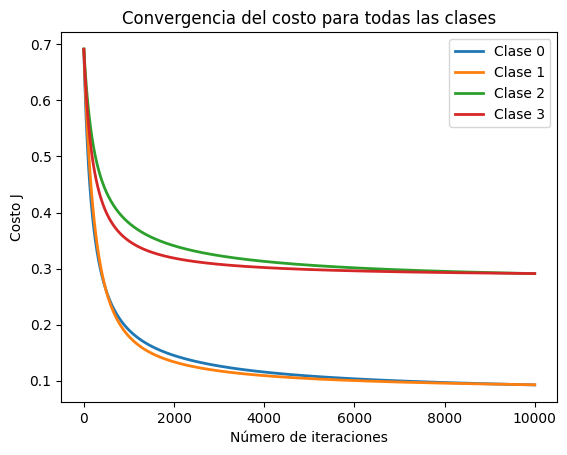

(4, 13)


In [443]:
lambda_ = 0.1
all_theta = OneVsAll(X_train, y_train, num_labels, lambda_)
print(all_theta.shape)

In [444]:
all_theta2 = OneVsAllOM(X_train, y_train, num_labels, lambda_)
print(all_theta2.shape)

(4, 13)


In [445]:
print(all_theta)

[[-2.34455538 -0.30277863 -0.03793965  0.09140343 -0.56464895  0.16822339
  -0.03657512 -0.51491706 -0.12688141 -3.43413858 -0.64684493 -0.19894213
  -0.24485048]
 [-4.07110554  0.30952056  0.01326364 -0.03220879  0.62848419 -0.10473274
   0.01542126  0.81750674  0.12539055 -0.77244836  0.17933756  0.15380396
   0.16680523]
 [-0.87747521 -0.36912897  0.05496702 -0.02225896 -0.76729965  0.26778833
  -0.06416545  0.74336937 -0.06006121  3.41374807 -1.17123596 -0.23979108
  -0.30731865]
 [-2.73129987  0.34900131 -0.04892621  0.05564605  0.79482307 -0.25910182
   0.06135295 -1.17491951  0.07051929  1.24456761  0.81984042  0.23218919
   0.33882214]]


In [446]:
def predictOneVsAll(all_theta, X):
    """
    Devuelve un vector de predicciones para cada ejemplo en la matriz X.
    Tenga en cuenta que X contiene los ejemplos en filas.
    all_theta es una matriz donde la i-ésima fila es un vector theta de regresión logística entrenada para la i-ésima clase.
    Debe establecer p en un vector de valores de 0..K-1 (por ejemplo, p = [0, 2, 0, 1]
    predice clases 0, 2, 0, 1 para 4 ejemplos).

    Parametros
    ----------
    all_theta : array_like
        The trained parameters for logistic regression for each class.
        This is a matrix of shape (K x n+1) where K is number of classes
        and n is number of features without the bias.

    X : array_like
        Data points to predict their labels. This is a matrix of shape
        (m x n) where m is number of data points to predict, and n is number
        of features without the bias term. Note we add the bias term for X in
        this function.

    Devuelve
    -------
    p : array_like
        The predictions for each data point in X. This is a vector of shape (m, ).
    """

    m = X.shape[0];
    num_labels = all_theta.shape[0]
    p = np.zeros(m)
    # Agrega columna de 1s (bias) a X
    Xb = np.concatenate([np.ones((m, 1)), X], axis=1)

    # Calcula probabilidades para cada clase y toma la máxima
    p = np.argmax(sigmoid(Xb.dot(all_theta.T)), axis=1)

    return p

In [447]:
# Predicciones sobre entrenamiento
pred_train = predictOneVsAll(all_theta, X_train)

# Predicciones sobre prueba
pred_test = predictOneVsAll(all_theta, X_test)

# Precisión
print("Precisión entrenamiento: {:.2f}%".format(np.mean(pred_train == y_train) * 100))
print("Precisión prueba: {:.2f}%".format(np.mean(pred_test == y_test) * 100))


Precisión entrenamiento: 82.90%
Precisión prueba: 83.33%


Precisión entrenamiento: 82.90%
El 82.90% de los ejemplos del conjunto de entrenamiento fueron correctamente clasificados por el modelo.

Precisión prueba: 83.33%
El 83.33% de los ejemplos del conjunto de prueba fueron correctamente clasificados.
